In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

file_path = 'AHCCD_CONFINED_with_seasonal_filled.csv'
df_ahccd = pd.read_csv(file_path)

numeric_columns = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
    'Annual', 'Winter', 'Spring', 'Summer', 'Autumn'
] #selecting numeric columns

scaler = MinMaxScaler()#normalse features
df_ahccd[numeric_columns] = scaler.fit_transform(df_ahccd[numeric_columns])

df_ahccd['Class'] = df_ahccd['Year'].apply(lambda x: 'pre_1997' if x < 1997 else 'post_1997')#labels rows as pre or post 1997

X = df_ahccd[numeric_columns].values #features are only the numeric columns
y = df_ahccd['Class'] #class labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)#train test split

knn = KNeighborsClassifier(n_neighbors=3) #train the classifier
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) #evaluate model
accuracy = knn.score(X_test, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

print(f"Number of unique stations: {len(df_ahccd['Station'].unique())}")

Accuracy: 0.8634
              precision    recall  f1-score   support

   post_1997       0.74      0.68      0.71      5083
    pre_1997       0.90      0.92      0.91     15779

    accuracy                           0.86     20862
   macro avg       0.82      0.80      0.81     20862
weighted avg       0.86      0.86      0.86     20862

Number of unique stations: 469


#### Importing

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from scipy.stats import sem, t
import matplotlib.pyplot as plt
import seaborn as sns

#### Analysing Model

Average Accuracy: 0.8613
95% Confidence Interval: (0.8543750696271489, 0.8682158846617706)


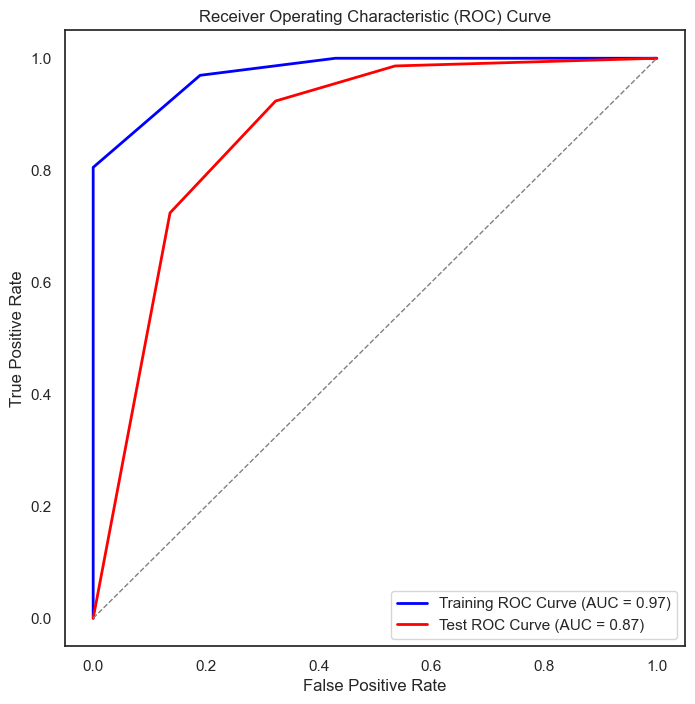

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

scores = cross_val_score(knn, X, y, cv=5)  #5-fold cross-validation
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))

print(f"Average Accuracy: {mean_score:.4f}")
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

label_encoder = LabelEncoder() #encode labels for ROC curve
y_train_binary = label_encoder.fit_transform(y_train)
y_test_binary = label_encoder.transform(y_test)

y_train_prob = knn.predict_proba(X_train)[:, 1]#predcted probabiliities for positive class
y_test_prob = knn.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)#compute ROC curves
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

auc_train = auc(fpr_train, tpr_train)#calc area under curve
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 8))#plotting
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



The mean values of the classes are 0.8779179077677081 0.3318906157780838
The standard deviations of the classes are 0.22107173596954258 0.364678277296286


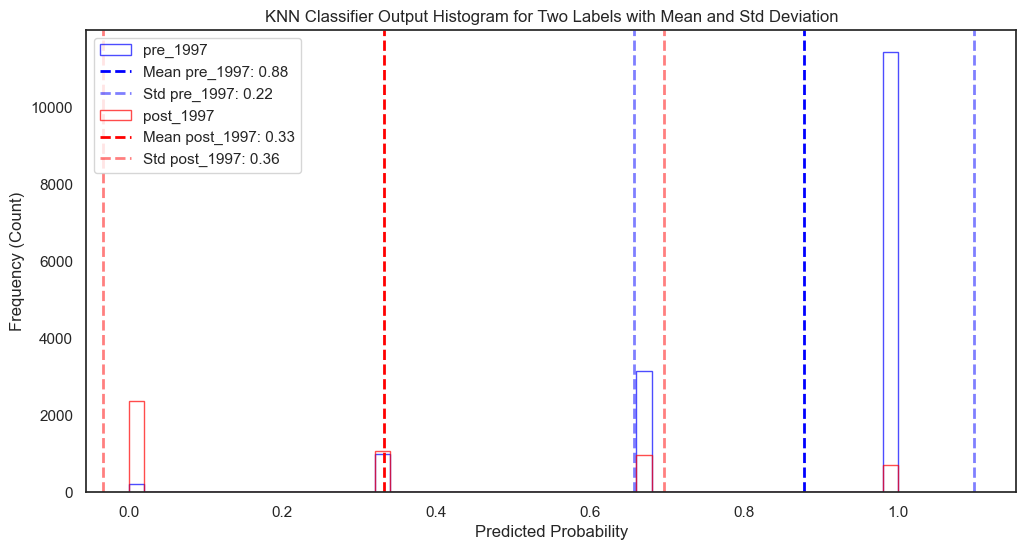

The Z-score for the nominal KNN classifier is 1.2803898560366245


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#dataframe with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

label_1 = 'pre_1997'#labels for histogram
label_2 = 'post_1997'

data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']#filter dataframe for each label
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

mean_label_1 = np.mean(data_label_1)#mean
std_label_1 = np.std(data_label_1)#std dev

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

#\\ Histograms //
plt.figure(figsize=(12, 6))

plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('KNN Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2))

print('The Z-score for the nominal KNN classifier is', z)

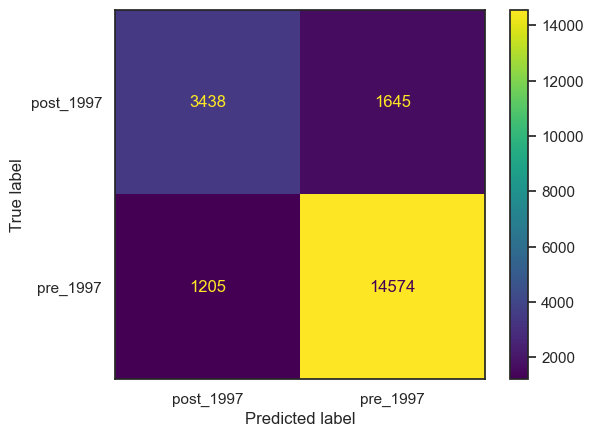

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn.classes_).plot()
plt.show()


In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5)
print(f"Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")


Mean Accuracy: 0.8613, Std Dev: 0.0050
